# Libraries

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

# Book Recommender System

Building a Recommender System, here I am using goodbooks-10k DataSet from KAggle.It contains Ten thousand books, one million ratings.Each user has a unique id.This dataset has five files names book_tags.csv,books.csv, ratings.csv, tags.csv and to_read.csv.Here i am working on two daset name books.csv and ratings.csv

Link:https://www.kaggle.com/zygmunt/goodbooks-10k

In [81]:
ratings = pd.read_csv("ratings.csv")
ratings.columns = ['bookID','userID','bookRating']
print('table of ratings : (Rows, Cols No): ',ratings.shape)
ratings.head(5)

table of ratings : (Rows, Cols No):  (981756, 3)


,bookID,userID,bookRating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


Load the ratings.csv file using panda read.In ratings table it has 981756 records of books rating data and 3 fields name- User ID, ISBN, and Book Rating

In [82]:
books = pd.read_csv("books.csv")
books.drop(['best_book_id','work_id','isbn','isbn13','title','language_code','work_ratings_count','work_text_reviews_count','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','image_url','small_image_url'], axis=1, inplace=True)
books.columns = ['ID','bookID', 'books_count','bookAuthor','yearOfPublication','bookTitle','average_rating','ratings_count']
print('table of books : (Rows, Cols No): ',books.shape)
books.head(5)

table of books : (Rows, Cols No):  (10000, 8)


,ID,bookID,books_count,bookAuthor,yearOfPublication,bookTitle,average_rating,ratings_count
0,1,2767052,272,Suzanne Collins,2008.0,The Hunger Games,4.34,4780653
1,2,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,4.44,4602479
2,3,41865,226,Stephenie Meyer,2005.0,Twilight,3.57,3866839
3,4,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671
4,5,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664


Load the books.csv file using panda read.In books table it has 10000 records of books users data and 8 fields.Drop 'best_book_id','work_id','isbn','isbn13','title','language_code','work_ratings_count','work_text_reviews_count','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','image_url','small_image_url' which is not necessary for me to recommend book

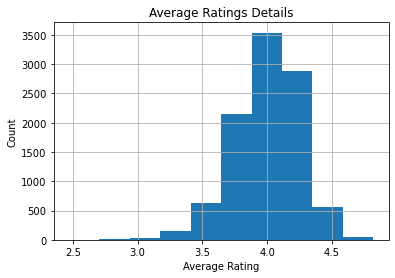

In [85]:
books['average_rating'].hist()
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Average Ratings Details')
plt.show()


In [86]:
print("We have %d users"%ratings.userID.nunique())
print("We have %d books"%ratings.bookID.nunique())
print("We have year Of Publication")
books.yearOfPublication.unique()

We have 53424 users
We have 10000 books
We have year Of Publication


array([ 2008.,  1997.,  2005.,  1960.,  1925.,  2012.,  1937.,  1951.,
        2000.,  1813.,  2003.,  2011.,  1949.,  1945.,  1947.,  2009.,
        1999.,  1954.,  2010.,  2002.,  1998.,  2007.,  1595.,  1988.,
        1993.,  1950.,  1996.,  2006.,  1868.,  1847.,  2001.,  1953.,
        1974.,  1979.,  1932.,  1884.,  1952.,  2015.,  1995.,  2004.,
        1969.,  1936.,  1985.,  1818.,  1977.,  1811.,  -720.,  1946.,
        1859.,  1990.,  1964.,  1989.,  1958.,  1973.,  1967.,  1911.,
        1891.,  1897.,  1963.,  1844.,  2013.,  1862.,  1961.,  1876.,
        1962.,  1955.,  1991.,  1600.,  1965.,  1939.,  1908.,  1850.,
        2014.,  1606.,  1860.,  1942.,  1978.,  1815.,  1877.,  1986.,
        1866.,  1922.,  1987.,  1851.,  1982.,  1843.,  1976.,  1994.,
        1915.,  1956.,    nan,  1980.,  1865.,  1817.,  1957.,  1926.,
        1943.,  1938.,  1966.,  1981.,  2016.,  1992.,  1984.,  1972.,
        1882.,  1895.,  1899.,  1983.,  -750.,  1900.,  1975.,  1971.,
      

In [106]:
most_ratings = books.sort_values(by = 'ratings_count', ascending = False)[['ID','bookTitle','ratings_count', 'average_rating' ]][0:10]

most_ratings


,ID,bookTitle,ratings_count,average_rating
0,1,The Hunger Games,4780653,4.34
1,2,Harry Potter and the Philosopher's Stone,4602479,4.44
2,3,Twilight,3866839,3.57
3,4,To Kill a Mockingbird,3198671,4.25
4,5,The Great Gatsby,2683664,3.89
5,6,The Fault in Our Stars,2346404,4.26
6,7,The Hobbit or There and Back Again,2071616,4.25
7,8,The Catcher in the Rye,2044241,3.79
9,10,Pride and Prejudice,2035490,4.24
8,9,Angels & Demons,2001311,3.85


Here we can see most ratings books which are recommended by users

In [88]:
margeddata = pd.merge(ratings, books, on='bookID')

margeddata.head(5)

,bookID,userID,bookRating,ID,books_count,bookAuthor,yearOfPublication,bookTitle,average_rating,ratings_count
0,1,314,5,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823
1,1,439,3,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823
2,1,588,5,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823
3,1,1169,4,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823
4,1,1185,4,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823


Add ratings and books dataset togather based on bookID.

In [89]:
top_ten_books= pd.DataFrame(margeddata.groupby('bookTitle')['bookRating'].count().sort_values(ascending=False).head(10))

print('Here Top Ten Books recommendation : ')
top_ten_books

Here Top Ten Books recommendation : 


,bookRating
bookTitle,
鋼の錬金術師 1,100
Moonraker,100
My Life in France,100
My Friend Leonard,100
Mrs. Frisby and the Rats of NIMH,100
Bleachers,100
Mother of Pearl,100
Mostly Harmless,100
Mornings on Horseback,100


In [90]:
usercounts1=ratings['userID'].value_counts()
Ratings=ratings['userID'].value_counts()>200
new_users=list(usercounts1[Ratings].index)
ratings=ratings[ratings['userID'].isin(new_users)]

Here we check which users get less than 200 ratings

In [91]:
book_ratingCount=margeddata.groupby('bookTitle')['bookRating'].count().reset_index()
book_ratingCount.rename(columns={'bookRating':'num_ratings'},inplace=True)
rating_popular_book=book_ratingCount[book_ratingCount['num_ratings']>=50]
rating_with_totalRatingCount=margeddata.merge(rating_popular_book,on='bookTitle')
rating_with_totalRatingCount.drop_duplicates(['userID','bookTitle'])


,bookID,userID,bookRating,ID,books_count,bookAuthor,yearOfPublication,bookTitle,average_rating,ratings_count,num_ratings
0,1,314,5,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823,100
1,1,439,3,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823,100
2,1,588,5,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823,100
3,1,1169,4,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823,100
4,1,1185,4,27,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,4.54,1678823,100
...,...,...,...,...,...,...,...,...,...,...,...
77915,9998,51295,5,8114,90,"Kōbō Abe, E. Dale Saunders",1962.0,砂の女 [Suna no onna],3.91,11467,95
77916,9998,51559,5,8114,90,"Kōbō Abe, E. Dale Saunders",1962.0,砂の女 [Suna no onna],3.91,11467,95
77917,9998,52087,4,8114,90,"Kōbō Abe, E. Dale Saunders",1962.0,砂の女 [Suna no onna],3.91,11467,95
77918,9998,52330,4,8114,90,"Kōbō Abe, E. Dale Saunders",1962.0,砂の女 [Suna no onna],3.91,11467,95


Calculate for book ratingCount i group book titles with cobine of books and ratins data named margedata and create a new column named num_ratings.I filter more then 50 for popular books.Then marge with margedata.and drop duplicates column named 'userID'and 'bookTitle'

In [92]:
book_rating_pivot=rating_with_totalRatingCount.pivot_table(columns='userID',index='bookTitle',values='bookRating')
book_rating_pivot=book_rating_pivot.fillna(0)

In [93]:
book_rating_pivot

userID,2,3,4,7,9,10,11,14,15,20,...,53404,53406,53408,53409,53416,53419,53420,53422,53423,53424
bookTitle,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animal Farm & 1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carter Beats the Devil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Fellowship of the Ring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
スプートニクの恋人 [Supūtoniku no Koibito],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
海辺のカフカ [Umibe no Kafuka],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
砂の女 [Suna no onna],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
book_matrix=csr_matrix(book_rating_pivot)
model=NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(book_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [95]:
def recommendations(book_name):
   
    distances, indices = model.kneighbors(book_rating_pivot.loc[book_name,:].values.reshape(1, -1), n_neighbors =11)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(book_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, book_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


In [96]:
recommendations("Harry Potter and the Half-Blood Prince")

Recommendations for Harry Potter and the Half-Blood Prince:

1: Harry Potter and the Order of the Phoenix, with distance of 0.4444738573252147:
2: Harry Potter and the Philosopher's Stone, with distance of 0.49084774300774026:
3: Heidi, with distance of 0.5119913445564398:
4: Harry Potter and the Prisoner of Azkaban, with distance of 0.5197672572777041:
5: The Lord of the Rings: Weapons and Warfare, with distance of 0.5335204712425707:
6: Neither Here Nor There: Travels in Europe, with distance of 0.5470259248241003:
7: The Hitchhiker's Guide to the Galaxy, with distance of 0.5480253562627083:
8: The Lord of the Rings, with distance of 0.5559040489922186:
9: Heretics of Dune, with distance of 0.5699071694597835:
10: A Short History of Nearly Everything, with distance of 0.5713511003724161:


In [97]:

query_index = np.random.choice(book_rating_pivot.shape[0])
print(query_index)
distances, indices = model.kneighbors(book_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)

577


In [98]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Hound of the Baskervilles:

1: Moonraker, with distance of 0.9298084540596931:
2: The BFG, with distance of 0.960697185588139:
3: O Zahir, with distance of 0.9623390123858697:
4: Virgin, with distance of 0.9652825224644097:
5: A Spot of Bother, with distance of 0.9692446428151967:
6: The Five People You Meet in Heaven, with distance of 0.9730412303427306:
7: Persuasion, with distance of 0.9737318916413074:
8: Deception Point, with distance of 0.9747855081418879:
9: Dispatches, with distance of 0.9755543700036399:
10: Metamorphoses, with distance of 0.9780735662458593:
